# Data Analysis Assignment 2

## Adam Fair

In [1]:
# This cell loads all the packages needed for this assignment

if (!require(ipumsr)) install.packages("ipumsr")
require(tidyverse)
require(ipumsr)
require(dplyr)
require(ggplot2)
require(tidyr)


Loading required package: ipumsr
Warning message:
"package 'ipumsr' was built under R version 3.6.3"Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Prerequisites

The code in the cell below is needed to bring the data into a format that allows it to be used within R, and it is **necessary** to continue the assignment, so you need to run the cell _after you have successfully completed the prerequisites section of the assignment_. Most of the commands you have already seen during class, so feel free to inspect and understand what it does. You can ignore the warning message for "as.tibble"

In [2]:
# Loading and cleaning the data

india_dat_file <- "IPUMS.dat"
india_xml_file <- "IPUMS.xml"

india_ddi <- read_ipums_ddi(india_xml_file)
india_data_raw <- read_ipums_micro(india_ddi, data_file = india_dat_file )



  factors <- c( "urban", "sex", "edattain" )
  names(india_data_raw) <- tolower(names(india_data_raw))
  
  india04 <- india_data_raw %>%
            as.tibble() %>%
            mutate(age = as.integer(age)) %>%
            select(year, urban, age, sex, edattain, incwage, perwt) %>%
            mutate_at( funs(as.character(as_factor(ipumsr::lbl_clean(.)))), .vars = vars(factors)) %>%
            dplyr::filter(age <= 75, age >= 15)  %>%
            mutate(incwage  = ifelse(incwage > 99999, NA, incwage)) %>%
            mutate(incwage  = ifelse(incwage == 0, NA, incwage)) %>%
            as.tibble() %>%
            mutate(edattain = ifelse(edattain == "Less than primary completed", 
                                                  "<primary", edattain) ,
                   edattain = ifelse(edattain == "Primary completed",
                                                  "primary", edattain),
                   edattain = ifelse(edattain == "Secondary completed",
                                                  "secondary", edattain),
                   edattain = ifelse(edattain == "University completed",
                                                  "university", edattain))
                                          


remove(india_data_raw, india_ddi)


Use of data from IPUMS-International is subject to conditions including that
users should cite the data appropriately. Use command `ipums_conditions()` for
more details.


Warning message:
"`as.tibble()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session."Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

If you can successfuly run the code above, the india04 dataframe should have been created. You can check if india04 has been created by running the cell below:

In [3]:
india04

year,urban,age,sex,edattain,incwage,perwt
2004,Rural,27,Male,<primary,NA,1027.72
2004,Rural,25,Female,<primary,NA,1027.72
2004,Rural,25,Male,<primary,NA,1027.72
2004,Rural,22,Female,<primary,NA,1027.72
2004,Rural,65,Male,<primary,NA,1027.72
2004,Rural,62,Female,<primary,NA,1027.72
2004,Rural,50,Male,secondary,NA,1027.72
2004,Rural,47,Female,<primary,NA,1027.72
2004,Rural,24,Male,<primary,NA,1027.72
2004,Rural,21,Female,<primary,NA,1027.72


## Section 1 Exercises

### 1. (10 pts) For each of the following conditions, write a line of code that finds all individuals that:
#### 1) Have a wage of above 1000 rupees per week;
#### 2) Have an education of primary or less (“<primary” or “primary”);
#### 3) Are between 45 and 50 years old;
#### 4) Worked in an elementary occupation or as professionals (write unique(india04$occisco) to get a list of all occupations);
#### 5) Earned more than 1500 rupees, but were less than 40 years old.

In [4]:
# Type Code in this cell that answers the question

# Have a wage of above 1000 rupees per week;
filter(india04, incwage > 1000)

# Have an education of primary or less (“<primary” or “primary”);
education <- c("<primary", "primary") 
filter(india04, edattain %in% education)

# Are between 45 and 50 years old;
filter(india04, age >= 45 & age <= 50 )

# Worked in an elementary occupation or as professionals (write unique(india04$occisco) to get a list of all occupations);
#?? There is no occisco variable in the dataframe. Check: head(india04) and unique (india04$occisco) returns "Warning message:"Unknown or uninitialised column: 'occisco'.""

# Earned more than 1500 rupees, but were less than 40 years old.
filter(india04, incwage > 1500, age < 40)

year,urban,age,sex,edattain,incwage,perwt
2004,Rural,54,Male,university,3450,1789.25
2004,Rural,45,Male,university,2070,1431.40
2004,Rural,46,Male,<primary,1075,2773.34
2004,Rural,36,Male,university,1800,327.52
2004,Rural,40,Male,university,3200,1057.43
2004,Rural,20,Male,<primary,2200,2690.25
2004,Rural,36,Male,secondary,1540,3429.61
2004,Rural,48,Male,secondary,2125,3540.24
2004,Rural,34,Male,university,1050,2320.86
2004,Rural,40,Male,secondary,1750,1856.69


year,urban,age,sex,edattain,incwage,perwt
2004,Rural,27,Male,<primary,NA,1027.72
2004,Rural,25,Female,<primary,NA,1027.72
2004,Rural,25,Male,<primary,NA,1027.72
2004,Rural,22,Female,<primary,NA,1027.72
2004,Rural,65,Male,<primary,NA,1027.72
2004,Rural,62,Female,<primary,NA,1027.72
2004,Rural,47,Female,<primary,NA,1027.72
2004,Rural,24,Male,<primary,NA,1027.72
2004,Rural,21,Female,<primary,NA,1027.72
2004,Rural,18,Male,<primary,NA,1027.72


year,urban,age,sex,edattain,incwage,perwt
2004,Rural,50,Male,secondary,NA,1027.72
2004,Rural,47,Female,<primary,NA,1027.72
2004,Rural,45,Male,<primary,240,770.79
2004,Rural,50,Male,<primary,NA,6744.46
2004,Rural,45,Female,<primary,NA,6744.46
2004,Rural,50,Female,<primary,NA,2315.86
2004,Rural,50,Female,<primary,NA,5210.68
2004,Rural,45,Male,<primary,400,5210.68
2004,Rural,50,Female,<primary,NA,3473.78
2004,Rural,47,Male,<primary,NA,3473.78


year,urban,age,sex,edattain,incwage,perwt
2004,Rural,36,Male,university,1800,327.52
2004,Rural,20,Male,<primary,2200,2690.25
2004,Rural,36,Male,secondary,1540,3429.61
2004,Rural,37,Male,university,2100,578.94
2004,Rural,38,Male,university,2100,1422.83
2004,Rural,32,Male,university,1750,2687.57
2004,Rural,36,Female,university,3400,1213.02
2004,Rural,30,Male,secondary,1600,676.66
2004,Rural,30,Male,university,1600,135.33
2004,Rural,36,Male,university,2100,445.50


### 2. (2 pts) Another useful dplyr filtering helper is between(). What does it do? Show how you could use it to simplify the code needed to answer one of the previous challenges.

In [5]:
# Type Code in this cell that answers the question

# Are between 45 and 50 years old;
filter(india04, between(age, 45, 50))


year,urban,age,sex,edattain,incwage,perwt
2004,Rural,50,Male,secondary,NA,1027.72
2004,Rural,47,Female,<primary,NA,1027.72
2004,Rural,45,Male,<primary,240,770.79
2004,Rural,50,Male,<primary,NA,6744.46
2004,Rural,45,Female,<primary,NA,6744.46
2004,Rural,50,Female,<primary,NA,2315.86
2004,Rural,50,Female,<primary,NA,5210.68
2004,Rural,45,Male,<primary,400,5210.68
2004,Rural,50,Female,<primary,NA,3473.78
2004,Rural,47,Male,<primary,NA,3473.78


### (2 pts) How many individuals have a missing incwage?

In [6]:
# Type Code in this cell that answers the question

sum(is.na(india04$incwage))


[1] 316183

## Section 2 Exercises

### 1. (2 pts) How could you use arrange() to sort all missing values in incwage to the start? (Hint: use is.na()).

In [7]:
# Type Code in this cell that answers the question

arrange(india04, desc(is.na(incwage)))


year,urban,age,sex,edattain,incwage,perwt
2004,Rural,27,Male,<primary,NA,1027.72
2004,Rural,25,Female,<primary,NA,1027.72
2004,Rural,25,Male,<primary,NA,1027.72
2004,Rural,22,Female,<primary,NA,1027.72
2004,Rural,65,Male,<primary,NA,1027.72
2004,Rural,62,Female,<primary,NA,1027.72
2004,Rural,50,Male,secondary,NA,1027.72
2004,Rural,47,Female,<primary,NA,1027.72
2004,Rural,24,Male,<primary,NA,1027.72
2004,Rural,21,Female,<primary,NA,1027.72


### 2. (2 pts) Sort india04 to find the richest individuals at the top.

In [8]:
# Type Code in this cell that answers the question

arrange(india04, desc(incwage))


year,urban,age,sex,edattain,incwage,perwt
2004,Urban,48,Male,secondary,37500,861.33
2004,Urban,52,Male,university,30000,983.25
2004,Urban,37,Male,university,25000,983.25
2004,Urban,36,Male,secondary,25000,983.25
2004,Urban,53,Male,university,18570,14.50
2004,Urban,51,Male,university,18000,2206.75
2004,Urban,59,Male,secondary,17500,980.00
2004,Urban,33,Male,university,16690,2269.80
2004,Rural,57,Male,university,15000,288.92
2004,Rural,35,Male,secondary,15000,3105.92


### 3. (2 pts) Sort india04 to find the oldest and richest individuals at the top.

In [9]:
# Type Code in this cell that answers the question

arrange(india04, desc(age), desc(incwage))


year,urban,age,sex,edattain,incwage,perwt
2004,Urban,75,Male,university,10500,1112.08
2004,Urban,75,Male,primary,3500,114.00
2004,Rural,75,Female,university,2125,29.37
2004,Rural,75,Male,<primary,910,1580.59
2004,Urban,75,Male,secondary,750,1580.00
2004,Rural,75,Male,<primary,600,1122.28
2004,Urban,75,Female,<primary,570,3648.00
2004,Urban,75,Male,primary,569,894.85
2004,Rural,75,Female,<primary,560,6558.31
2004,Rural,75,Male,primary,490,688.80


## Section 3 Exercises

### 1. (5 pts) Notice that if you run rename(india04, income = incwage), the variables names in the india04 dataset do not change. Why?

The `rename()` function keeps all the variables that are not explicitly mentioned. This is why when we use `rename()` the variable's names do not change.

### 2. (5 pts) What happens if you include the name of a variable multiple times in a select() call?

The `select()` call ignores the duplication. Any duplicated variables are only included once, in the first location they appear. The `select()` function does not raise an error or warning or print any message if there are duplicated variables.

### 3. (5 pts) What does the one_of() function do? Why might it be helpful in conjunction with this vector?

The `one_of` returns all the variables you ask for, for example ones stored in a vector. It may be helpful in conjuction with this vector to be used to return variables contained in the vector.

## Section 4 Exercises

### 1. (5 pts) In a new dataframe called india04_new, create a new variable called yob (year of birth) using the year in which the survey was taken (2004) and age

In [10]:
# Type Code in this cell that answers the question

india04_new <- select(india04, everything())
mutate(india04_new, yob = year - age)

year,urban,age,sex,edattain,incwage,perwt,yob
2004,Rural,27,Male,<primary,NA,1027.72,1977
2004,Rural,25,Female,<primary,NA,1027.72,1979
2004,Rural,25,Male,<primary,NA,1027.72,1979
2004,Rural,22,Female,<primary,NA,1027.72,1982
2004,Rural,65,Male,<primary,NA,1027.72,1939
2004,Rural,62,Female,<primary,NA,1027.72,1942
2004,Rural,50,Male,secondary,NA,1027.72,1954
2004,Rural,47,Female,<primary,NA,1027.72,1957
2004,Rural,24,Male,<primary,NA,1027.72,1980
2004,Rural,21,Female,<primary,NA,1027.72,1983


### 2. (10 pts) Create a new variable in the india04_new dataframe called exp (potential experience) as the number of years lived since 18. Create a new variable called exp_error in the same dataset that takes the value “FALSE” whenever experience is negative, and “TRUE” otherwise.

In [11]:
# Type Code in this cell that answers the question

india04_new <- mutate(india04_new, exp = age - 18)
india04_new <- mutate(india04_new, exp_error = ifelse(exp > 0, "TRUE", "FALSE"))

### 3. (5 pts) Create a new variable in the india04_new dataframe called dev (deviation) as the difference between an individual’sage and the average age in the sample.

In [12]:
# Type Code in this cell that answers the question

india04_new <- mutate(india04_new, dev = age - mean(age))


### 4. (5 pts) What does 1:3 + 1:10 return? Why?

The code ` 1:3 + 1:10` returns: `2 4 6 5 7 9 8 10 12 11` along with the warning message: `"longer object length is not a multiple of shorter object length"`.
The warning message appears because the code is a function on vectors and the vectors provided are not of the same length. You can see in the output that when the vector `1:3` ran out it restarted until we had reached the end of the second vector `1:10`.

### 5. (5 pts) Create a vector c(1,2,4,2,2). Which rank variable should you use to get the answer c(1,2,5,2,2)? Which should you use to get c(1,2,3,2,2)? Explain why!

c(1,2,4,2,2)

In [13]:
c(1,2,4,2,2)
min_rank(c(1,2,4,2,2))
dense_rank(c(1,2,4,2,2))

[1] 1 2 4 2 2

[1] 1 2 5 2 2

[1] 1 2 3 2 2

## Section 5 Exercises

### 1. (10 pts) Create a new dataframe, india04_sec5 using a pipe that:

#### 1. Starts with india04;
#### 2. Creates rupee yearly income from the weekly rupee wages;
#### 3. Calculates the average yearly income by education level and urban rural status, weighted by perwt.

In [14]:
india04_sec5 <- india04 
india04_sec5 <- mutate(india04_sec5, anninc = incwage * 52)

india04_sec5 %>%
    group_by(edattain, urban) %>% 
     summarise(
     avg_anninc = weighted.mean(anninc, w = perwt, na.rm = TRUE))

edattain,urban,avg_anninc
<primary,Rural,13287.00
<primary,Urban,23658.66
primary,Rural,19558.90
primary,Urban,33139.46
secondary,Rural,41956.22
secondary,Urban,66479.84
university,Rural,86957.84
university,Urban,122717.19
Unknown,Rural,14059.00
Unknown,Urban,68653.86


### 2. (10 pts) Use the output of the pipe to plot a histogram with education level and average yearly income, and use a facet wrap on urban and rural. What patterns do you see in the data? Make sure to include your graph in your answer write-up.
##### This question requires both code and verbal answer

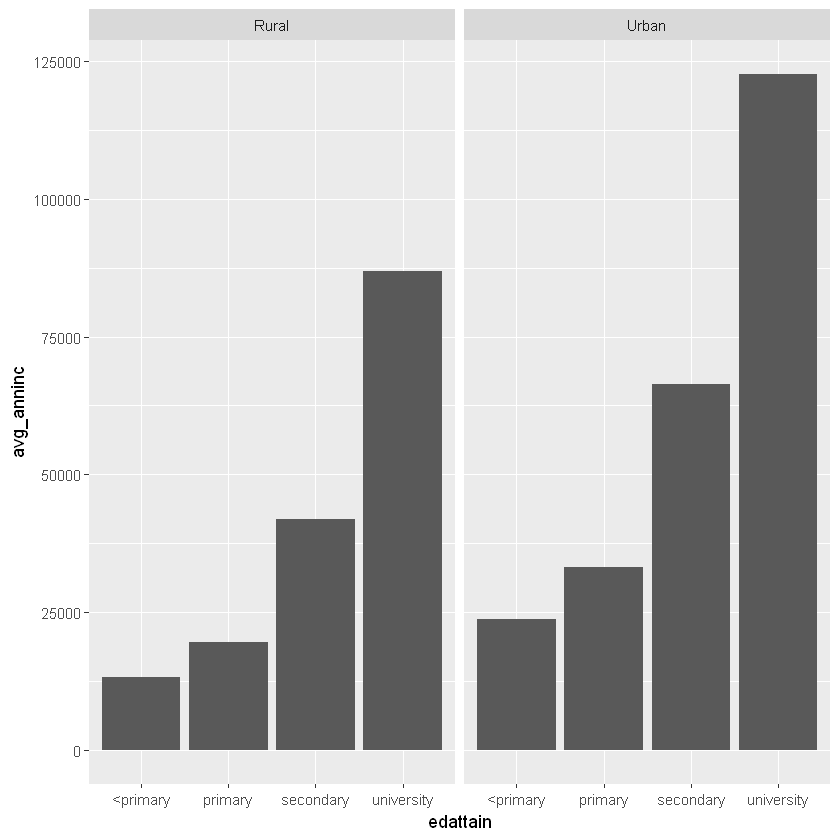

In [15]:
# Type Code in this cell that answers the question
 by_ed_urb <- group_by(india04_sec5, edattain, urban)
 
inc_ed_urb_base <- summarise(by_ed_urb,
                             count = n(),
                              avg_anninc = weighted.mean(anninc, w = perwt, na.rm = TRUE)
                              )
 inc_ed_urb <- filter(inc_ed_urb_base, edattain != "Unknown")

ggplot(data = inc_ed_urb, mapping = aes(x = edattain, y = avg_anninc)) +
   geom_bar(stat = "identity") +
   facet_wrap(~urban)

I see by observing the histogram output above, that individuals in India's weighted average annual incomes increase as their levels of education increase for both Rural and Urban individuals. 

However, those who live in Urban locations have higher weighted average annual incomes than those who live in Rural areas with the same level of education.For both This is true for comparisons made across Rural and Urban individuals at each level of education. 

Additionally for both Rural and Urban individuals we see the largest difference in weighted average annual income when we move from the secondary education level attatined to the University education level attained.

### 3. (5 pts) Create the sum of all values of perwt. What value do you find? Is this reasonable given the sample selection and the size of the Indian population?
##### This question requires both code and verbal answer

In [16]:
# Type Code in this cell that answers the question

sum(india04_sec5$perwt)

[1] 636494410

The value found is `636494409.86`, given that the size of the sample is 401,996 and the size of the Indian Population in 2004 was 1.14B, I believe that this value is reasonable.

### 4. (10 pts) Recreate question 1 by grouping by occupational levels. What are the professions with the highest average yearly income in urban areas? And in rural areas?
##### This question requires both code and verbal answer

In [17]:
# Type Code in this cell that answers the question

india04_sec5 %>%
group_by(edattain, urban) %>%
summarise(low = min(avg_anninc), high = max(avg_anninc))

# There is not an "occupational level" variable in the dataset -- therefore I cannot complete this answer as instructed. The code will use `eddattain` rather than `occiso`.


ERROR: Error: object 'avg_anninc' not found


I could not find the "occupational level" in the dataset, using several functions to list the variables or review the headers. there is no `occisco` variable. 

In order to still atempt the problem I looked at the `edattain` variable rather than `occisco` and I will write an analysis to answer the question adjusted for `edattain` in place of `occisco`.

